In [143]:
#Load the data frame
import pandas as pd
import numpy as np
import os

df = pd.read_csv("." + os.path.sep + "data" + os.path.sep + "autos-85.csv")

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [144]:
# Get the data with indications of which data is missing
missing_data = df.isnull()
missing_data.head(5)

# Count missing data
for column in missing_data.columns.values.tolist():
    print("--------")
    print("Column: '" + column + "' missing data: ")
    print(missing_data[column].value_counts())

--------
Column: 'symboling' missing data: 
False    205
Name: symboling, dtype: int64
--------
Column: 'normalized-losses' missing data: 
False    164
True      41
Name: normalized-losses, dtype: int64
--------
Column: 'make' missing data: 
False    205
Name: make, dtype: int64
--------
Column: 'fuel-type' missing data: 
False    205
Name: fuel-type, dtype: int64
--------
Column: 'aspiration' missing data: 
False    205
Name: aspiration, dtype: int64
--------
Column: 'num-of-doors' missing data: 
False    203
True       2
Name: num-of-doors, dtype: int64
--------
Column: 'body-style' missing data: 
False    205
Name: body-style, dtype: int64
--------
Column: 'drive-wheels' missing data: 
False    205
Name: drive-wheels, dtype: int64
--------
Column: 'engine-location' missing data: 
False    205
Name: engine-location, dtype: int64
--------
Column: 'wheel-base' missing data: 
False    205
Name: wheel-base, dtype: int64
--------
Column: 'length' missing data: 
False    205
Name: length, 

In [145]:
# Drop the NaN values in the prices column
df.dropna(subset=["price"], axis = 0, inplace = True)

# Reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [146]:
# Notice that the "normalized-losses" is a string
# df[["normalized-losses"]].info()

# See the type of data there actually is
# df[["normalized-losses"]].info

# Accroding to the documentation:
#     "normalized-losses" - continuous from 65 to 256.
# Continuous here means non-interrupted, but it is an integer
# So convert the column to numeric and then integer
df["normalized-losses"] = df["normalized-losses"].replace("?", np.nan)
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"])

In [147]:
# Replace the missing normalized losses value with the mean
# Then convert the result to the integer as this is supposed
# to be an int column according to the specification
mean_nl = df["normalized-losses"].mean()
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, mean_nl)
df["normalized-losses"] = df["normalized-losses"].astype(int)

In [148]:
# Notice that the "normalized-losses" is an integer
df[["city-mpg"]].info()

#Let us convert it from Miles per Galon (mpg) into Liters per Kilometer (lpg)
df["city-mpg"] = 235 / df["city-mpg"]

# Notice that the data is now a float
df[["city-mpg"]].info()

# Change the column name
df.rename(columns = {"city-mpg":"city-lpg"}, inplace = True)

#Not it is "city-lpg" of type float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   city-mpg  201 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city-mpg  201 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    objec

In [149]:
# Convert the price to the float, note that the NaN were still "?"
df["price"] = df["price"].replace("?", np.nan)
df.dropna(subset=["price"], axis = 0, inplace = True)
df["price"] = df["price"].astype(int)
df["price"].tail(5)

196    16845
197    19045
198    21485
199    22470
200    22625
Name: price, dtype: int64

In [150]:
# Simple feature scaling for "length"
# Will always be from 0 to 1 if values are positive
df[["length"]].info()

df[["length"]] /= df[["length"]].max()

df[["length"]].head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  201 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


,length
0,0.811148
1,0.811148
2,0.822681
3,0.848630
4,0.848630


In [151]:
# Min-Max scaling for column "width"
# Will always be from 0 to 1
df[["width"]].info()

df["width"] = (df["width"] - df["width"].min()) / (df["width"].max()-df["width"].min())

df["width"].head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   width   201 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


0    0.324786
1    0.324786
2    0.444444
3    0.504274
4    0.521368
Name: width, dtype: float64

In [152]:
# Z-score scaling for column "height"
# This will be in standard units (number of standard deviations)
# Typically within +/- 3 but outliers are possible 
df[["height"]].info()

df["height"] = (df["height"] - df["height"].mean())/df["height"].std()

df["height"].head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  201 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


0   -2.029015
1   -2.029015
2   -0.558319
3    0.217881
4    0.217881
Name: height, dtype: float64

In [153]:
# Make the bins for the price
bins = np.linspace(df["price"].min(), df["price"].max(), 4)

group_names = ["Low", "Medium", "High"]

df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest = True)

# We get a categorical column
df["price-binned"].head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: price-binned, dtype: category
Categories (3, object): [Low < Medium < High]

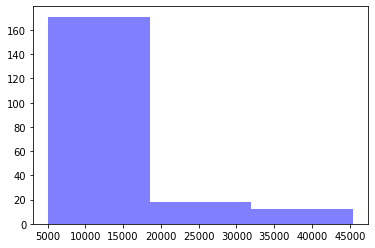

In [154]:
# Plot the histogram of the data
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(df["price"], 3, facecolor='blue', alpha=0.5)

plt.show()

In [155]:
# Categorical to numerical data conversison: One-hot encoding
df["diesel"] = (df["fuel-type"] == "diesel")
df["gas"] = (df["fuel-type"] == "gas")

df[["diesel","gas"]].head(10)

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
5,False,True
6,False,True
7,False,True
8,False,True
9,False,True


In [156]:
# Convert using pandas and get_dummies method: does the same
pd.get_dummies(df["body-style"])

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
196,0,0,0,1,0
197,0,0,0,1,0
198,0,0,0,1,0
199,0,0,0,1,0


In [157]:
# See which values are present in the column:
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [158]:
# Get the most common value automatically
df['num-of-doors'].value_counts().idxmax()

'four'

In [167]:
# Replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

# Convert columns to correct data types
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["horsepower"]]=df[["horsepower"]].astype("int")

df.dtypes

symboling               int64
normalized-losses       int64
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-lpg              float64
highway-mpg             int64
price                 float64
price-binned         category
horsepower-binned    category
diesel                  uint8
gas                     uint8
dtype: object

Text(0.5, 1.0, 'horsepower bins')

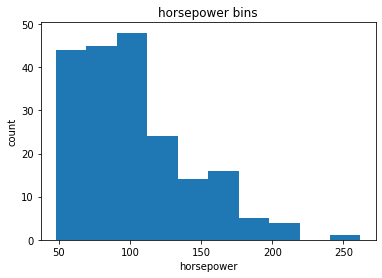

In [160]:
# Plot the histogram
df["horsepower"]=df["horsepower"].astype(int, copy=True)

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [161]:
# Histogram from the binned values
bins = np.linspace(df["horsepower"].min(), df["horsepower"].max(), 4)

bnames = ["Low", "Medium", "High"]

df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels = bnames, include_lowest = True)

df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Car hourse power separation')

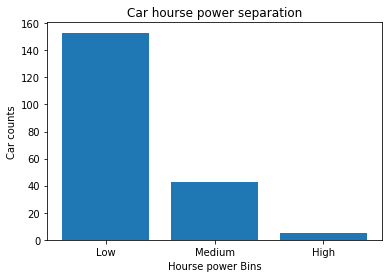

In [162]:
import matplotlib as plt
from matplotlib import pyplot

%matplotlib inline
pyplot.bar(bnames, df["horsepower-binned"].value_counts())

plt.pyplot.xlabel("Hourse power Bins")
pyplot.ylabel("Car counts")
pyplot.title("Car hourse power separation")

In [163]:
# Remove the categorical fuel type column and substitute it with two numeric ones
ft_dummies = pd.get_dummies(df["fuel-type"])
ft_dummies.head()

df.drop("gas", axis = 1, inplace = True)
df.drop("diesel", axis = 1, inplace = True)

# Add the new columns
df = pd.concat([df, ft_dummies], axis = 1) # axis = 1 is for concatinating columns

# Drop the original column
df.drop("fuel-type", axis = 1, inplace = True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-lpg,highway-mpg,price,price-binned,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,11.190476,27,13495.0,Low,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,11.190476,27,16500.0,Low,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,12.368421,26,16500.0,Low,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,9.791667,30,13950.0,Low,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,13.055556,22,17450.0,Low,Low,0,1


In [170]:
# Store the resulting data
df.to_csv("data" + os.path.sep + "autos_85_clean.csv", index=False)